In [1]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [3]:
from google.colab import files
uploaded = files.upload()


Saving Social_Network_Ads_Simplified.csv to Social_Network_Ads_Simplified.csv


In [4]:
df = pd.read_csv("Social_Network_Ads_Simplified.csv")
df.head()

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


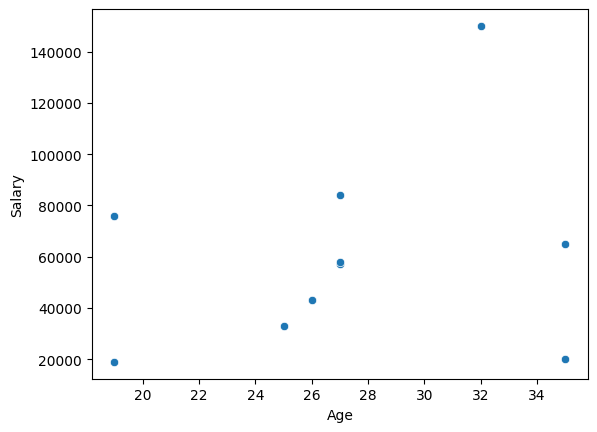

In [5]:
sns.scatterplot(x="Age", y="Salary", data=df)
plt.show()

In [6]:
X = df.iloc[:,0:2]
y = df.iloc[: , -1]

In [7]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state=2)

In [8]:
model = Sequential()

model.add(Dense(128 , activation = 'relu' , input_dim = 2))
model.add(Dense(1 , activation = 'sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(X_train , y_train , validation_data=(X_test , y_test) , epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 - loss: 6874.7412 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7500 - loss: 6488.6162 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.7500 - loss: 6103.4365 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.7500 - loss: 5719.2124 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.7500 - loss: 5335.9497 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.7500 - loss: 4954.7285 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.7500 - loss: 4574.7007 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7500 - 

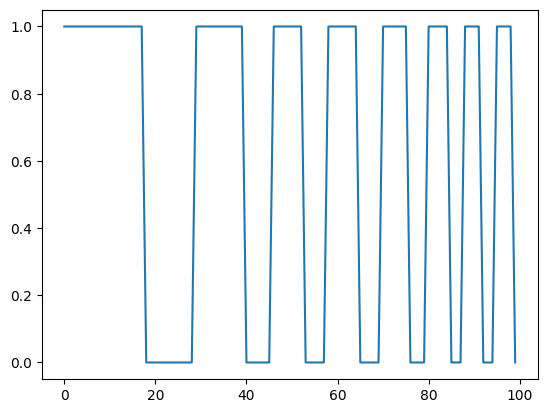

In [12]:
plt.plot(history.history['val_accuracy'])

Apply Scaling

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
X_train_scaled

array([[-0.05634362, -0.14961565],
       [-1.85933936, -1.18695082],
       [ 1.07052872,  2.29743141],
       [-0.28171808, -0.54859071],
       [-0.05634362, -0.17621399],
       [-0.05634362,  0.54194113],
       [ 1.74665213,  0.03657271],
       [-0.50709255, -0.81457409]])

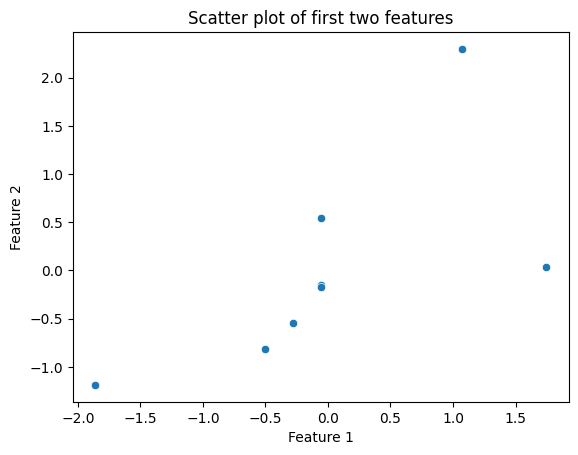

In [20]:
sns.scatterplot(x=X_train_scaled[:, 0], y=X_train_scaled[:, 1])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter plot of first two features")
plt.show()


In [22]:
model = Sequential()

model.add(Dense(128 , activation = 'relu' , input_dim = 2))
model.add(Dense(1 , activation = 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled , y_train , validation_data=(X_test_scaled , y_test) , epochs = 100)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 - loss: 0.7146 - val_accuracy: 0.5000 - val_loss: 0.6483
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.7500 - loss: 0.7036 - val_accuracy: 0.5000 - val_loss: 0.6468
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.7500 - loss: 0.6927 - val_accuracy: 0.5000 - val_loss: 0.6454
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.7500 - loss: 0.6821 - val_accuracy: 0.5000 - val_loss: 0.6441
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.7500 - loss: 0.6716 - val_accuracy: 0.5000 - val_loss: 0.6429
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7500 - loss: 0.6614 - val_accuracy: 0.5000 - val_loss: 0.6417
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7500 - loss: 0.6514 - val_accuracy: 0.5000 - val_loss: 0.6406
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8750 - loss: 0.6416 - val_accuracy: 0.5000 - val_loss: 0.6395
Epoch 

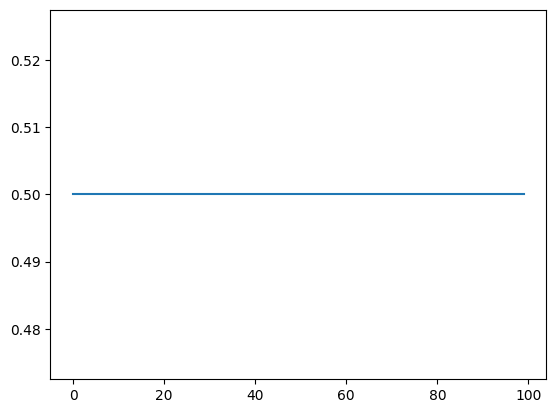

In [23]:
plt.plot(history.history['val_accuracy'])

In [24]:
#This shows constand val acc beacause we have very small dataset